# Problem Discription :

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Data Analysis

In [84]:

#importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [85]:
#Reading the DataSet to work on the Data Project and adding in the dataframe
dfchurn= pd.read_csv(r'churn.csv')

In [86]:
dfchurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [87]:
# reading the number of columns from the data set baseball.
dfchurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
#Check data shape (num of Rows & Columns)
dfchurn.shape

(7043, 21)

There are 7043 number or rows and 21 columns 

In [89]:
# preprocessing the Dataset by dealing with the missing values in the Dataset
dfchurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
# checking the outliers in the dataset
dfchurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are no Null values present in our data set so we can proceed further analysis

<AxesSubplot:ylabel='SeniorCitizen'>

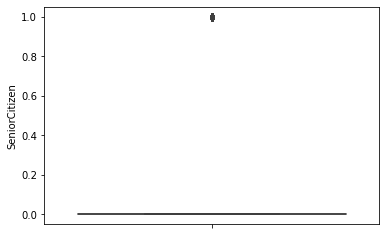

In [91]:
#Visualization using boxplot to check the outliers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(y='SeniorCitizen',data=dfchurn)


# Removal of Outliers

<AxesSubplot:ylabel='tenure'>

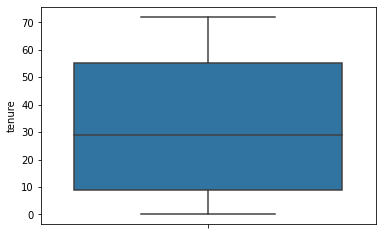

In [92]:
sns.boxplot(y='tenure',data=dfchurn)

<AxesSubplot:ylabel='MonthlyCharges'>

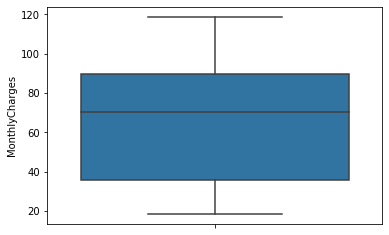

In [93]:
sns.boxplot(y='MonthlyCharges',data=dfchurn)

Observation - There are no outliers present in the dataset

# Removal of Skewness

In [94]:
dfchurn.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No

In [95]:
# skewness along the index axis
dfchurn.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [96]:
from scipy.stats import skew
import seaborn as sns

In [185]:
dfchurn2 = pd.DataFrame(dfchurn)
# Remove the mentioned columns name
dfchurn2.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','OnlineBackup','Churn','TotalCharges'],inplace=True, axis = 1)

In [186]:
dfchurn2

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


SeniorCitizen
1.8332421986079817


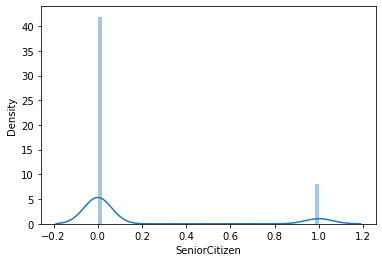

tenure
0.2394887299846216


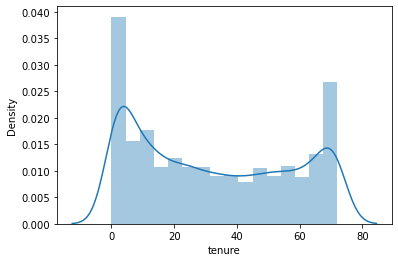

MonthlyCharges
-0.2204774644391769


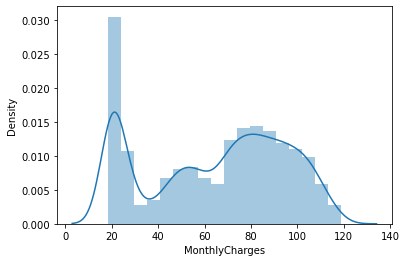

In [187]:
#Visualization to check skewness in SeniorCitizen     
for col in dfchurn2:
    print(col)
    print(skew(dfchurn2[col]))
    
    plt.figure()
    sns.distplot(dfchurn2[col])
    plt.show()

Observation - There is good amount of skewness present in 
SeniorCitizen
1.8332421986079817

tenure
0.2394887299846216

MonthlyCharges
-0.2204774644391769

We will check the corelation to further remove the skeness

In [ ]:
#Visualization to check skewness in Tenure     
import seaborn as sns

sns.displot(dfchurn['tenure'],kde =True)

In [ ]:
#Visualization to check skewness in Monthly Charges     
import seaborn as sns

sns.displot(dfchurn['MonthlyCharges'],kde =True)

Observation - There is skewness in the tenure and Monthly charges

In [ ]:
dfchurn.skew()

In [ ]:
#Visualization using heatmap
plt.figure(figsize=(14,14))  
sns.heatmap(dfchurn.corr(), annot=True)


In [ ]:
# Removal of skew ness 
dfchurn2["tenure"] = np.sqrt(dfchurn2["tenure"])

In [100]:
# Checking the Skewness
skew(dfchurn2['tenure'])

0.2394887299846216

In [101]:
# Removal of skew ness 
dfchurn2["MonthlyCharges"] = np.sqrt(dfchurn2["MonthlyCharges"])
skew(dfchurn2['MonthlyCharges'])

-0.48445380679672634

Observation - We can onserve the skewness is reduced from two features tenure and MonthlyCharges.We wont apply skewness to the negetive data as we can see in graph of Senior Citizen 

# Data Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

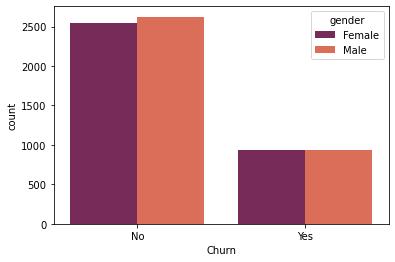

In [139]:
sns.countplot(x='Churn',data=dfchurn,hue='gender',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

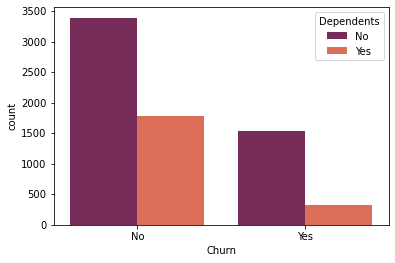

In [140]:
sns.countplot(x='Churn',data=dfchurn,hue='Dependents',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

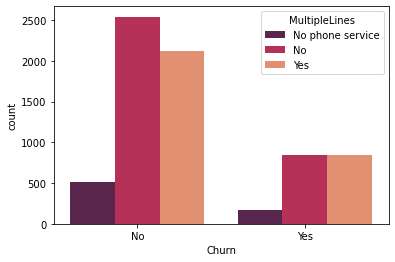

In [217]:
sns.countplot(x='Churn',data=dfchurn,hue='MultipleLines',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

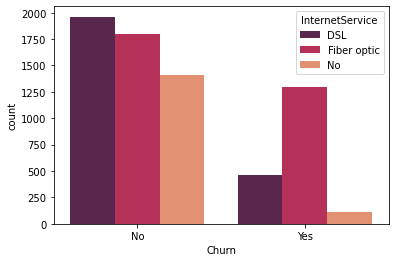

In [218]:
sns.countplot(x='Churn',data=dfchurn,hue='InternetService',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

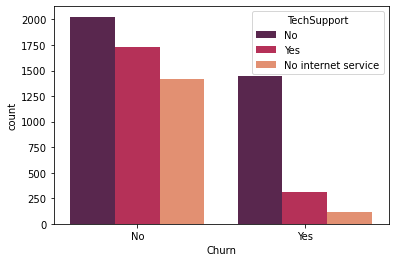

In [219]:
sns.countplot(x='Churn',data=dfchurn,hue='TechSupport',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

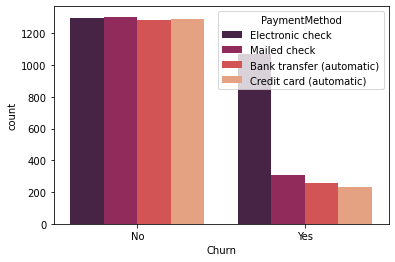

In [220]:
sns.countplot(x='Churn',data=dfchurn,hue='PaymentMethod',palette="rocket")

<AxesSubplot:xlabel='Churn', ylabel='count'>

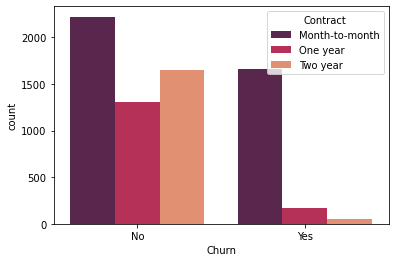

In [221]:
sns.countplot(x='Churn',data=dfchurn,hue='Contract',palette="rocket")

# Visualization of Numberical Data

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

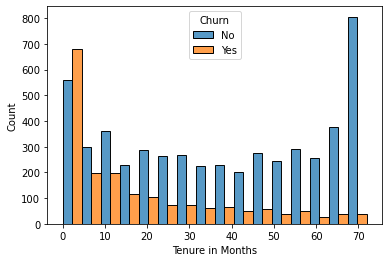

In [222]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = dfchurn, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

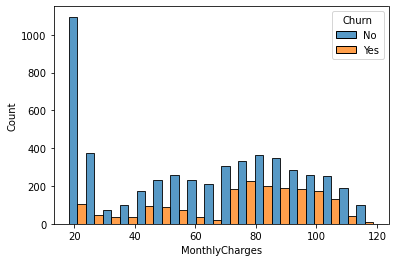

In [223]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=dfchurn,multiple='dodge')

# Scaling the Dataset

In [224]:
trans = StandardScaler()
data = trans.fit_transform(dfchurn2)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

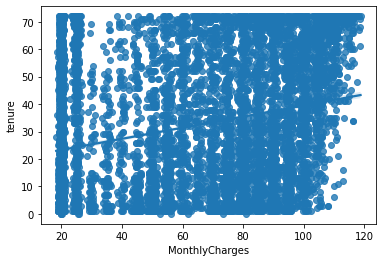

In [225]:
sns.regplot(x = 'MonthlyCharges',y= 'tenure',data=dfchurn)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>

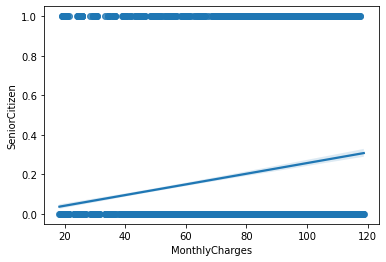

In [226]:
sns.regplot(x = 'MonthlyCharges',y= 'SeniorCitizen',data=dfchurn)

<AxesSubplot:xlabel='tenure', ylabel='SeniorCitizen'>

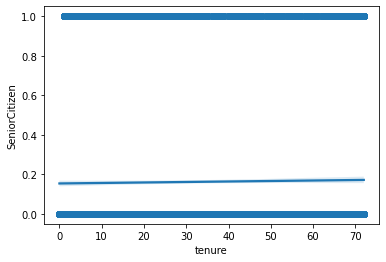

In [227]:
sns.regplot(x = 'tenure',y= 'SeniorCitizen',data=dfchurn)

In [228]:
# displaying the datatypes
display(dfchurn2.dtypes)
  


SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
dtype: object

# Applying Linear Regression approach

In [229]:
features = dfchurn2.drop("tenure",axis= 1)
target = dfchurn2["MonthlyCharges"]

In [230]:
# implementin MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
mns =   MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [231]:
for i in range(0,100):
        features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
        lr.fit(features_train,target_train)
        pred_train = lr.predict(features_train)
        pred_test = lr.predict(features_test)
        print(f"At random state{i}  :- {r2_score(target_train,pred_train)}")
        print(f"At random state{i} : {r2_score(target_test,pred_test)}")
        print("\n")

At random state0  :- 1.0
At random state0 : 1.0


At random state1  :- 1.0
At random state1 : 1.0


At random state2  :- 1.0
At random state2 : 1.0


At random state3  :- 1.0
At random state3 : 1.0


At random state4  :- 1.0
At random state4 : 1.0


At random state5  :- 1.0
At random state5 : 1.0


At random state6  :- 1.0
At random state6 : 1.0


At random state7  :- 1.0
At random state7 : 1.0


At random state8  :- 1.0
At random state8 : 1.0


At random state9  :- 1.0
At random state9 : 1.0


At random state10  :- 1.0
At random state10 : 1.0


At random state11  :- 1.0
At random state11 : 1.0


At random state12  :- 1.0
At random state12 : 1.0


At random state13  :- 1.0
At random state13 : 1.0


At random state14  :- 1.0
At random state14 : 1.0


At random state15  :- 1.0
At random state15 : 1.0


At random state16  :- 1.0
At random state16 : 1.0


At random state17  :- 1.0
At random state17 : 1.0


At random state18  :- 1.0
At random state18 : 1.0


At random state19  :- 1.0
At ran

In [232]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_train,pred_train)

from sklearn.model_selection import cross_val_score
for j in range (2,10):

    cv_score = cross_val_score(lr,features,target ,cv=j )
    cv_mean = cv_score.mean()
print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
print("\n")

At cross fold 9 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for testing is 1.0




TypeError: 'str' object is not callable

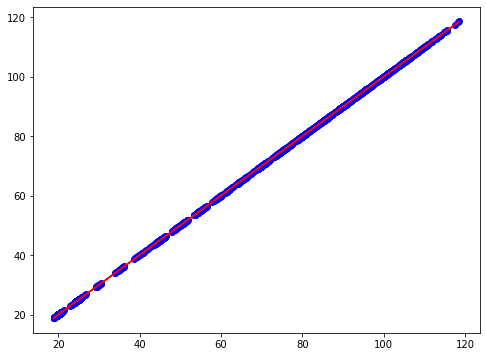

In [233]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8,6))
plt.scatter(x=target_test,y=pred_test,color='b')
plt.plot(target_test,target_test,color='r')
plt.xlabel('Actual Sales' ,fontsize=14)
plt.ylabel('Predicted Sales' ,fontsize=14)
plt.title('Linear regression' ,fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
            'random_state':list(range(0,10))}
ls= Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

In [ ]:
ls= Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

In [ ]:

lss= r2_score(target_test,pred_ls)
lss*100

In [ ]:
pred_ls = ls.predict (features_test)
cv_score = cross_val_score(ls,features,target ,cv=3)
cv_mean = cv_score.mean()
cv_mean *100

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print (clf.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score (features_train,target_train)
pred_decission=rf.predict(features_test)

rfs = r2_score(target_test,pred_decission)
print('R2 score ',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc =rfscore.mean()
print ('cross validation score',rfc*100)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x= dfchurn2.iloc[:,1:3]
x.head()

In [ ]:
#elbow method 
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel = ('Number of clusters')

In [ ]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters = 4, init ='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

In [ ]:
# It predicts the cluster number to which datapoints belong to 
test = kmeans.predict(np.asarray([[0,29.85]]))
test[0]

Observation - The model is predicting correct values .

In [ ]:
# saving the model to the local drive
import pickle
filename = 'finalised model.pickle'
pickle.dump(kmeans,open (filename,'wb'))

In [234]:

model = open('finalised model.pickle','rb')
forest = pickle.load(model)

In [235]:
y_prediction = forest.predict(X_test)

NameError: name 'X_test' is not defined

In [236]:
metrics.r2_score(y_test, y_prediction)

NameError: name 'metrics' is not defined

Conclusion

We went through the various tasks involved in Churn prediction in this article. It is important to note that finding patterns in Exploratory Data Analysis (EDA) is as important as the final prediction itself.

A Churn prediction task remains unfinished if the data patterns are not found in EDA. Most people can do the prediction part but struggle with data visualization and conveying the findings in an interesting way.

This skill is not only limited to Churn prediction but will also help you in the solving of the usual data science problems.